In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
matplotlib.rcParams.update({'font.size': 16})

In [3]:
outpath = "output/ontology_heatmap/"

In [4]:
# def compartment_colors(compartments):

#     import matplotlib.colors as pltcolors

#     cmap = plt.cm.get_cmap("YlOrRd")

#     compartment_color_dict = {}
#     j=1/len(compartments)
#     for c in compartments:
#         compartment_color_dict[c] = pltcolors.to_hex(cmap(j))
#         j+=1/len(compartments)

#     return compartment_color_dict
  
def compartment_colors(compartments):
  compartment_color_dict = {comp : col for comp, col in zip(compartments,sns.color_palette("deep",len(compartments)))}
  return compartment_color_dict

In [9]:
dfs = {}
datanames = ["HLCA4_P2_10x_with_postprocessing_lung","HLCA4_P3_10x_with_postprocessing_lung"]
# names = ["P2","P3"]
names = ["Ind 1","Ind 2"]
in_path = "../scripts/output/rijk_zscore/"
for dataname in datanames:
  df = pd.read_parquet("{}{}_sym_S_0.1_z_0.0_b_5.pq".format(in_path,dataname),columns=["ontology","scZ","cell_gene","cell","geneR1A_uniq","free_annotation","compartment"])
  df = df.drop_duplicates("cell_gene")
  df["ontology_gene"] = df["ontology"] + df["geneR1A_uniq"]
  df = df[~df["ontology_gene"].isna()]
  df["mz"] = df["ontology_gene"].map(df.groupby("ontology_gene")["scZ"].median())
  df = df.drop_duplicates("ontology_gene")
  dfs[dataname] = df

In [46]:
genes = ["MYL6","RPS24","CD47"]

In [47]:
heat_df = df[df["ontology"].isin(set(dfs[datanames[0]]["ontology"]).intersection(set(dfs[datanames[1]]["ontology"])))][["ontology","compartment","free_annotation"]].drop_duplicates()

In [48]:
heat_df.set_index("free_annotation",drop=True,inplace=True)

In [49]:
heat_df

,ontology,compartment
free_annotation,,
Vascular Smooth Muscle,lungstromalVascular Smooth Muscle,stromal
Airway Smooth Muscle,lungstromalAirway Smooth Muscle,stromal
Macrophage,lungimmuneMacrophage,immune
Myofibroblast,lungstromalMyofibroblast,stromal
Alveolar Fibroblast,lungstromalAlveolar Fibroblast,stromal
Pericyte,lungstromalPericyte,stromal
Capillary Aerocyte,lungendothelialCapillary Aerocyte,endothelial
Alveolar Epithelial Type 2,lungepithelialAlveolar Epithelial Type 2,epithelial
Adventitial Fibroblast,lungstromalAdventitial Fibroblast,stromal


In [50]:
for gene in genes:
  for i in range(len(datanames)):
    gene_df = dfs[datanames[i]][dfs[datanames[i]]["geneR1A_uniq"] == gene]
    mz_dict = pd.Series(gene_df.mz.values,index=gene_df.ontology).to_dict()
    heat_df["{} {}".format(gene,names[i])] = heat_df.ontology.map(mz_dict)

In [51]:
num_cols = [c for c in heat_df.columns if c not in ["compartment","ontology"]]

In [52]:
heat_df[num_cols].dropna().max().max()

1.0787967943965755

In [53]:
heat_df = heat_df.sort_values("compartment")

In [54]:
compartments = sorted([x for x in list(df["compartment"].unique()) if x != None])

palette = compartment_colors(compartments)


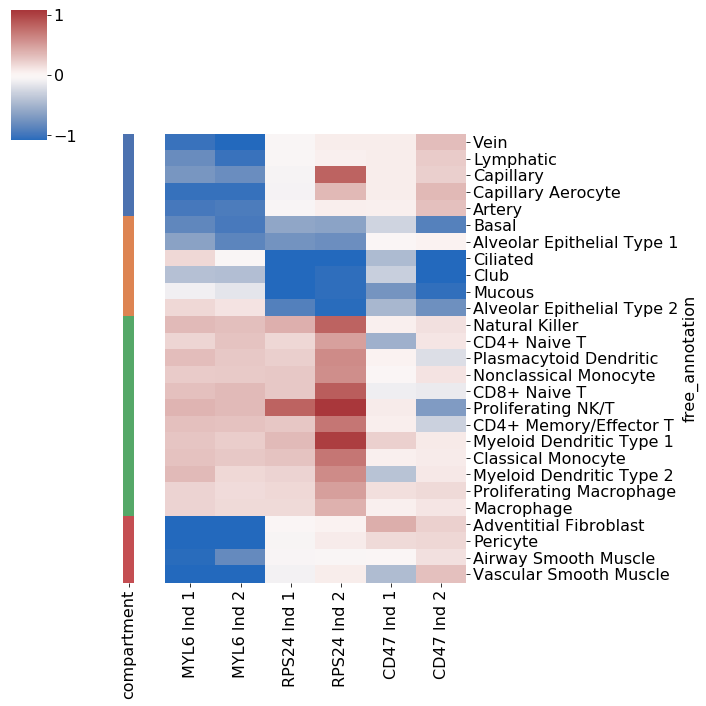

In [55]:
cg = sns.clustermap(heat_df[num_cols].dropna(),cmap="vlag",vmin=-heat_df[num_cols].dropna().max().max(),vmax=heat_df[num_cols].dropna().max().max(),row_colors=heat_df["compartment"].map(palette),row_cluster=False,yticklabels=True)
cg.ax_row_dendrogram.set_visible(False)
cg.ax_col_dendrogram.set_visible(False)
plt.savefig("{}{}_{}.png".format(outpath, "_".join(datanames),"_".join(genes)),bbox_inches="tight")
plt.show()